# Assignment 4 | Kernels
### Disha Singh | Anushka Basu
##### April $16^{th}$ 2021

---



**Q:1 Show that optimal w is:** \
$w^* = \left(\sum_{n=1}^N \left(x^{(n)}\right) \left( x^{(n)}\right)^\top + \lambda I \right)^{-1} \sum_{n=1}^N x^{(n)} y^{(n)}$ 

**Answer:**

Our Loss L(W): \

$L(w)=\sum_{n=1}^{N}(y^{(n)}-w \cdot x^{(n)})^2+\lambda ||w||^2$  

$\nabla L(w) = 2 (x^{(n)})^{\top}\sum_{n=1}^{N}(x^{(n)}w-y^{n})+2\lambda w$ 

For optimum Loss, the above $\nabla L(w^*) = 0$

Therefore, \
$-(x^{(n)})^{\top}\sum_{n=1}^{N}(x^{(n)}w^*-y^{n}) = \lambda w^* $ 

$\sum_{n=1}^{N}(x^{n}y^{n}) = w^*(\lambda I + \sum_{n=1}^{N}x^{n}(x^{n})^{\top})$

Hence,

$w^* = \left(\sum_{n=1}^N \left(x^{(n)}\right) \left( x^{(n)}\right)^\top + \lambda I \right)^{-1} \sum_{n=1}^N x^{(n)} y^{(n)}$

---







**Q:2 Suppose now that we apply a basis expansion to x so that the goal is instead to minimize $
\sum_{n=1}^N \left(w \cdot h(x^{(n)}) - y^{(n)}\right)^2 + \lambda \Vert w \Vert ^2$. What now is the optimal $w^*$? Argue why your answer is correct.** \


**Answer:**

Our Loss L(W): \

$L(w)=\sum_{n=1}^N \left(w \cdot h(x^{(n)}) - y^{(n)}\right)^2 + \lambda \Vert w \Vert ^2$  

$\nabla L(w) = 2 (h(x^{(n)}))^{\top}\sum_{n=1}^{N}(h(x^{(n)})w-y^{n})+2\lambda w$ 

For optimum Loss, the above $\nabla L(w^*) = 0$

Therefore, \
$-(h(x^{(n)}))^{\top}\sum_{n=1}^{N}(h(x^{(n)})w^*-y^{n}) = \lambda w^* $ 

$\sum_{n=1}^{N}(h(x^{(n)})y^{n}) = w^*(\lambda I + \sum_{n=1}^{N}h(x^{(n)})(h(x^{(n)}))^{\top})$

Hence,

$w^* = \left(\sum_{n=1}^N \left(h(x^{(n)})\right) \left( h(x^{(n)})\right)^\top + \lambda I \right)^{-1} \sum_{n=1}^N h(x^{(n)}) y^{(n)}$

---



**Q:3**
**Derive an expression for $y^\text{pred}$ that makes no reference to $h(\cdot)$ or $w^$.\
Answer:**

Given $y^\text{pred}=w^* \cdot h(x^\text{pred})$

In this case,

$w^* = \left(\sum_{n=1}^N \left(h(x^{(n)})\right) \left( h(x^{(n)})\right)^\top + \lambda I \right)^{-1} \sum_{n=1}^N h(x^{(n)}) y^{(n)}$

We have $k(x,x')=h(x) \cdot h(x')$

We define a kernel matrix K using our kernel function k(x,x'):
$\begin{aligned}K_{nm} = k(x^{(n)},x^{(m)}).
\end{aligned}$

We define $\alpha$ using K as $\alpha =(K+\lambda I)^{-1}y$

So $y^\text{pred}$ can be re-written as:

$ y^\text{pred}=\sum_{n=1}^{N}\alpha_{n}h(x^{(n)})\cdot h(x^\text{pred})$ \\
or $y^\text{pred}=\sum_{n=1}^{N}\alpha_{n}k(x^{(n)},x^\text{pred}).$

---









**Q:4 Derive a kernel function k(x,x') such that $k(x,x')=h(x) \cdot h(x')$ for the following h(x)** \

$h(x) = [c_0, c_1 x, c_2 x^2, \cdots, c_P x^P],\ c_p = \sqrt {P \choose p}$

**Answer:** \

$h(x) \cdot h(x') = c_0^2 + c_1^2 x.x' + c_2 x^2.x'^2 + ... + c_P^2 x^P.x'^P $\
                  $= \sum_{p=0}^P c_p^2 x^p x'^p $ \
                  $= \sum_{p=0}^P {P \choose p} (x.x')^p $ \
                  $= (1 + xx')^P $

Hence, $k(x, x') = (1 + xx')^P $

---



                  



In [ ]:
import numpy as np
stuff = np.load("../report_src/data_synth.npz")
X_trn = stuff['X_trn']
Y_trn = stuff['Y_train']
X_val = stuff['X_val']
Y_val = stuff['Y_val']

In [ ]:
import csv
def write_csv(y_pred, filename):
    """Write a 1d numpy array to a Kaggle-compatible .csv file"""
    with open(filename, 'w') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Id', 'Category'])
        for idx, y in enumerate(y_pred):
            csv_writer.writerow([idx, y])      

In [ ]:
from scipy.special import comb
def get_poly_expansion(P):
    def expand(X):
        tmp = [np.sqrt(comb(P,p))*X**p for p in range(P+1)]
        return np.vstack(tmp).T
    return expand

**Q:5 Provide a function that will evaluate ridge-regression when using basis expanded data** \



In [ ]:
def eval_basis_expanded_ridge(x,w,h):
    y = np.dot(h(x), w.T)
    return y

**Q:6  Provide a function that will do ridge-regularization on basis-expanded data**

In [ ]:
def train_basis_expanded_ridge(X,Y,λ,h):
    H = h(X)
    C = H.T @ H
    # w = (C + λI)^-1 H_T.y
    w = np.linalg.solve(C + λ*np.identity(H.shape[1]), np.dot(H.T, Y))
    return w

**Q:7 For each value of $P \in \{1,2,3,5,10\}$, do basis-expanded ridge regression on the given dataset with $\lambda = 0.1$**

In [46]:
P = [1,2,3,5,10]
λ = 0.1
w_list = []
print("-----Part1: Report vector w for each p------")
print("{0:<5}".format("P"), "|","{0:^8}".format("w"))

for p in P:
  h = get_poly_expansion(p)
  w = train_basis_expanded_ridge(X_trn,Y_trn,λ,h)
  w_list.append({'p': p, 'w': w})
  print("{0:<5}".format(p), "|",f"{w}")

-----Part1: Report vector w for each p------
P     |    w    
1     | [1.00565302 0.12351259]
2     | [ 1.55636445 -0.09905134  0.02105954]
3     | [ 2.2585207  -0.4731082   0.09166343 -0.0074039 ]
5     | [ 2.32031733e-01  1.70733532e+00 -7.50673264e-01  1.66018570e-01
 -2.11820885e-02  1.49990203e-03]
10    | [ 1.00205358e+00  3.45997631e-01 -6.78138819e-02  4.03688019e-02
 -2.40934086e-02  7.29636835e-03 -1.30601071e-03  1.48737707e-04
 -1.05271082e-05  3.69346864e-07  2.85424464e-09]


In [ ]:
import matplotlib.pyplot as plt

X_input = list(range(16))
X_input = np.array(sorted(list(X_input)))
fig, axs = plt.subplots(3, 2, figsize=(10,10))
axs[2, 1].axis('off')
for i, item in enumerate(w_list):
  h = get_poly_expansion(item['p'])
  fw_x = eval_basis_expanded_ridge(X_input, item['w'], h)
  current_plot = axs[i//2, i%2]
  current_plot.scatter(X_trn, Y_trn)
  current_plot.plot(X_input, fw_x, 'r-')  
  current_plot.set(xlabel='X', ylabel='f_w(x)')
  current_plot.legend([ 'P='+str(item['p']) ])

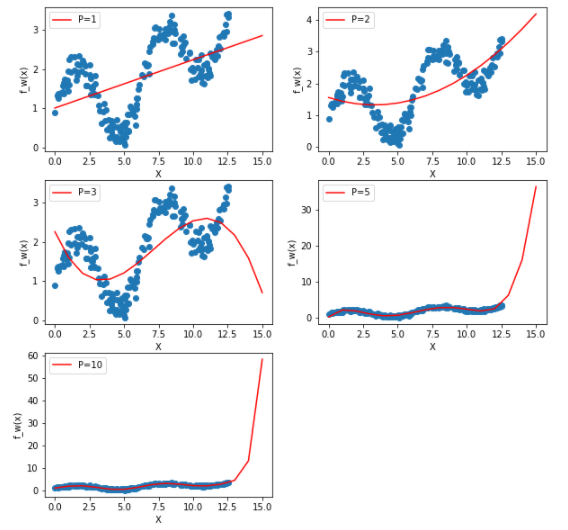



---


**Q:8 Implement a method to get a polynomial kernel.**

In [ ]:
def get_poly_kernel(P):
    def k(x,xp):
      kernel_value = (1 + x*xp)**P
      return kernel_value
    return k

**Q:9 Run the following code. What's the output ?**

In [ ]:
x  = 0.5
xp = 0.7
k  = get_poly_kernel(5)
h  = get_poly_expansion(5)
out1 = k(x,xp)
out2 = np.inner(h(x),h(xp))
print("-------OUTPUT----------")
print("output 1", out1)
print("output 2", out2)

-------OUTPUT----------
output 1 4.484033437500002
output 2 [[4.48403344]]


**Q:10 Implement a function to train a kernel ridge regression model.**

In [ ]:
def train_kernel_ridge(X,Y,λ,k):
  K = np.zeros((X.shape[0], X.shape[0]))

  for n, x_n in enumerate(X):
    for m, x_m in enumerate(X):
        K[n][m] = k(x_n, x_m)

  # α = (K + λI)^{-1} y
  α = np.linalg.solve(K + λ*np.identity(X.shape[0]), Y)
  return α

**Q:11 Implement a function to evaluate a kernel ridge regression model** \
$y = \sum_{n=1}^N \alpha_n k(x^{(n)},x)$

In [ ]:
def eval_kernel_ridge(X_trn, x, α, k):
  y = 0
  for i, x_n in enumerate(X_trn):
    y += α[i]*k(x_n, x)
  return y

**Q:12 For each value of $P \in \{1,2,3,5,10\}$, do kernel-expanded ridge regression using a P-th order polynomial kernel on the given dataset with $\lambda=0.1$**

In [ ]:
P = [1,2,3,5,10]
λ = 0.1
X_input = list(range(16))
X_input = np.array(sorted(list(X_input)))

fig, axs = plt.subplots(3, 2, figsize=(10,10))
axs[2, 1].axis('off')
for j, p in enumerate(P):
  k = get_poly_kernel(p)
  α = train_kernel_ridge(X_trn,Y_trn,λ,k)
  fw_x = []
  for i in range(0, len(X_input)):
    fw_x.append(eval_kernel_ridge(X_trn, X_input[i], α, k))
  current_plot = axs[j//2, j%2]
  current_plot.scatter(X_trn, Y_trn)
  current_plot.plot(X_input, fw_x, 'r-')  
  current_plot.set(xlabel='X', ylabel='f_w(x)')
  current_plot.legend([ 'P='+str(item['p']) ])

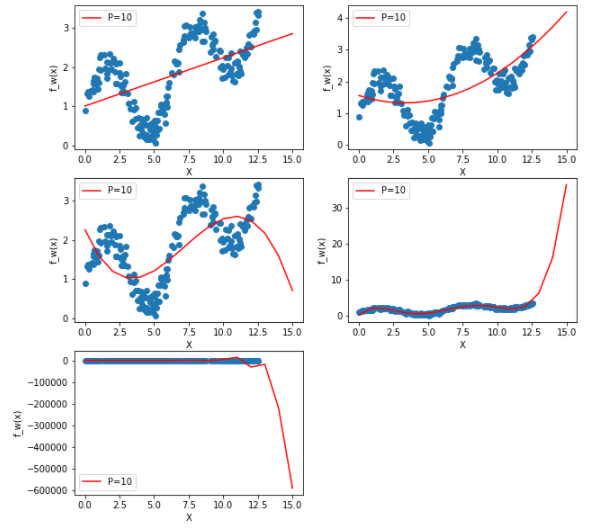



---


**Q:13 How do your results using kernel ridge regression compare to those you obtained using basis-expanded ridge regression? Explain why in at most two sentences**

Answer: \

In higher order kernel ridge regression, in this case -> 10, we tend to overfit more to the training data due to higher capacity which makes the model perform poorly on X_val data and it also starts yielding values much lesser than 0 too.


---



# Support Vector Machines
---



In [ ]:
stuff = np.load("../report_src/data_real.npz")
xtrn = stuff['x_trn']
ytrn = stuff['y_trn']
xtst = stuff['x_tst']

**Q:14 Train a support vector machine with a linear kernel with each of the following regularization penalties: $\lambda \in \{2, 20, 200\}$**

In [ ]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.metrics import hinge_loss
from sklearn.svm import SVC

λ = [2,20,200]
#get k folds (k=5)
kf = KFold(n_splits=5,shuffle=True, random_state=None)
print("{0:<5}".format("λ"),"|","Mean validation-set hinge loss")
for lam in λ:
  mean_error = 0
  err=[]
  clf = SVC(C=1/(2*lam), kernel='linear')
  for train_index, test_index in kf.split(xtrn):
      
      Xk_train, Xk_test = xtrn[train_index], xtrn[test_index]
      yk_train, yk_test = ytrn[train_index], ytrn[test_index]

      # fitting the model
      clf.fit(Xk_train, yk_train)

      # predict the response
      y_pred = clf.predict(Xk_test)

      # predict the response
      err.append(hinge_loss(yk_test, y_pred, labels=[0,1]))

  mean_error = sum(err)/len(err)
  print("{:<5}".format(lam), "|","{:^8.5f}".format(mean_error))

λ     | Mean validation-set hinge loss
2     | 0.57866 
20    | 0.57873 
200   | 0.58033 


**Q:15 Train a support vector machine using a polynomial kernel of degree P=3, $\gamma \in \{1,.01,.001\}$, $\lambda \in \{2, 20, 200\}$ with kernel function: $k(x,x') = (\gamma + x \cdot x')^P$. Also use 5-fold cross-validation.**


In [ ]:
def SVM_kernel(P, kernel):
  λ = [2,20,200]
  γ = [1,.01,.001]
  #get k folds (k=5)
  kf = KFold(n_splits=5,shuffle=True, random_state=None)
  print("Validation-set hinge loss")
  print("{0:<5}".format("λ"),"|","{0:^8}".format("γ = 1"),"|",
        "{0:^8}".format("γ = 0.01"),"|","{0:^8}".format("γ = 0.001"))
  for lam in λ:
    gamma_mean_error = []
    for gam in γ:
      folds_err=[]
      clf = SVC(C=1/(2*lam), kernel=kernel, degree=P, gamma=gam)
      for train_index, test_index in kf.split(xtrn):        
          Xk_train, Xk_test = xtrn[train_index], xtrn[test_index]
          yk_train, yk_test = ytrn[train_index], ytrn[test_index]

          # fitting the model
          clf.fit(Xk_train, yk_train)

          # predict the response
          y_pred = clf.predict(Xk_test)

          # predict the response
          folds_err.append(hinge_loss(yk_test, y_pred, labels=[0,1]))
      gamma_mean_error.append(sum(folds_err)/len(folds_err))
    print("{:<5}".format(lam),"|",
          "{0:^8.5f}".format(gamma_mean_error[0]),"|",
          "{0:^8.5f}".format(gamma_mean_error[1]),"|",
          "{0:^8.5f}".format(gamma_mean_error[2]))

In [ ]:
## calling the above function
SVM_kernel(P=3, kernel='poly')

Validation-set hinge loss
λ     |  γ = 1   | γ = 0.01 | γ = 0.001
2     | 0.55832  | 0.64142  | 1.00000 
20    | 0.57297  | 0.87325  | 1.00000 
200   | 0.57146  | 0.97376  | 1.00000 


**Q:16 Repeat the previous question, but using a polynomial of degree P=5 instead.**

In [ ]:
SVM_kernel(P=5, kernel='poly')

Validation-set hinge loss
λ     |  γ = 1   | γ = 0.01 | γ = 0.001
2     | 0.56556  | 0.85268  | 1.00000 
20    | 0.57731  | 0.89939  | 1.00000 
200   | 0.58158  | 0.94751  | 1.00000 


**Q:17 Train a radial basis function $k(x,x') = \exp \left(-\gamma \Vert x - x' \Vert^2 \right)$, with $\gamma \in \{1,.01,.001\}$ and $\lambda \in \{2, 20, 200\}$. Also use 5-fold cross-validation.**

In [ ]:
SVM_kernel(P=5, kernel='rbf')

Validation-set hinge loss
λ     |  γ = 1   | γ = 0.01 | γ = 0.001
2     | 0.59903  | 0.56707  | 0.58312 
20    | 1.00000  | 0.59030  | 0.99854 
200   | 1.00000  | 1.00000  | 1.00000 


**Q:18 Which kernel (with which value \gamma, if applicable) and which regularization constant performed best? Fix this kernel, retrain on all the data.**

* Best kernel = 'poly' with P=3, best λ = 2, best γ = 1 as they give minimum loss.
* Estimated 0-1 generalization error: 0.55832  
* Observed generalization error on the leaderboard: 1 - 0.99416 = 0.00584

In [ ]:
lamda = 2
kernel = 'poly'
P = 3
gamma = 1
kf = KFold(n_splits=5,shuffle=True, random_state=None)
clf = SVC(C=1/(2*lamda), kernel=kernel, degree=P, gamma=gamma)
#train on 5 folds
for train_index, test_index in kf.split(xtrn):        
  Xk_train = xtrn[train_index]
  yk_train = ytrn[train_index]
  clf.fit(Xk_train, yk_train)

#train on all data
clf.fit(xtrn, ytrn)
# make predictions on test data
y_pred = clf.predict(xtst)

write_csv(y_pred.astype('int'), 'svm_predictions.csv')

***